#2. Analysis of Parallel Algorithms [10%]

2. Scaled speed-up is defined as the speedup obtained when the problem size is increased linearly with the number of processing elements; that is, if W is chosen as a base problem size for a single processing element, then $$\text{scaled speedup} = \frac{pW}{T_p(pW, p)}$$

For the problem of adding $n$ numbers on $p$ processing elements, assume that it takes 20 time units to communicate a 
number between two processing elements, and that it takes one unit of time to add two numbers. Plot the 
standard speedup curve for the base problem size $p = 1, n = 256$ and compare it with the scaled speedup 
curve with $p = 2^2, 2^4, 2^5, 2^8$.

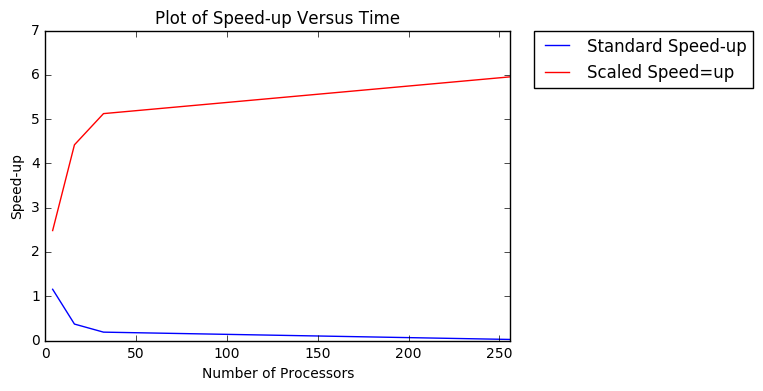

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as mpatches

#processors
exponents  = [2,4,5,8]
p = [2**i for i in exponents]

#problem size
n = 2**8 #256

#costs
comm = 20
W_t = 1 # work per time to sum 2 numbers

def serial_time(w_t, n):
    T_1 = (n-1)*w_t
    return(T_1)


def parallel_time(p, C, w_t, n):    
    T_p = serial_time(w_t,n/p)
    for i in range(p):
        T_p += C*p/(2**i) + p/(2**i)*w_t
    return(T_p)

def standard_speed(p, C, w_t, n):
    T_p = parallel_time(p, C, w_t, n)
    T_1 = serial_time(w_t, n)
    
    return(T_1/T_p)

def scaled_speed(p, C, w_t, n):
    T_p = parallel_time(p, C, w_t, n)
    
    return(n/T_p)



scale = [scaled_speed(i,comm, W_t,n*i) for i in p]
stand = [standard_speed(i, comm, W_t,n) for i in p]
axes = plt.gca()
plt.plot(p, stand, '-b', label='Standard Speed-up')
plt.plot(p, scale, '-r', label='Scaled Speed=up')
# plt.yscale('log')
axes.set_ylim([0,np.ceil(max(scale + stand))+1])
axes.set_xlim([0,max(p)])
plt.xlabel('Number of Processors')
plt.ylabel('Speed-up')
plt.title('Plot of Speed-up Versus Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()